In [87]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from matplotlib.pyplot import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [88]:
def kmeans(X,k,max_iterations=100):
    '''
    X: multidimensional data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    
    Steps:
    1. Convert data to numpy aray
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg class of each data point
    '''
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P

In [89]:
# load dataset into Pandas DataFrame
df = pd.read_csv('dataset.csv', names=['StockSymbol','Industry','SubIndustry','Ret2000.01','Ret2000.02','Ret2000.03','Ret2000.04','Ret2000.05','Ret2000.06','ret2000.07','Ret2000.08','Ret2000.09','Ret2000.10','Ret2000.11','Ret2000.12','Ret2001.01','Ret2001.02','Ret2001.03','Ret2001.04','Ret2001.05','Ret2001.06','Ret2001.07','Ret2001.08','Ret2001.09','Ret2001.10','Ret2001.11','Ret2001.12','Ret2002.01','Ret2002.02','Ret2002.03','Ret2002.04','Ret2002.05','Ret2002.06','Ret2002.07','Ret2002.08','Ret2002.09','Ret2002.10','Ret2002.11','Ret2002.12','Ret2003.01','Ret2003.02','Ret2003.03','Ret2003.04','Ret2003.05','Ret2003.06','Ret2003.07','Ret2003.08','Ret2003.09','Ret2003.10','Ret2003.11','Ret2003.12','Ret2004.01','Ret2004.02','Ret2004.03','Ret2004.04','Ret2004.05','Ret2004.06','Ret2004.07','Ret2004.08','Ret2004.09','Ret2004.10','Ret2004.11','Ret2004.12','Ret2005.01','Ret2005.02','Ret2005.03','Ret2005.04','Ret2005.05','Ret2005.06','Ret2005.07','Ret2005.08','Ret2005.09','Ret2005.10','Ret2005.11','Ret2005.12','Ret2006.01','Ret2006.02','Ret2006.03','Ret2006.04','Ret2006.05','Ret2006.06','Ret2006.07','Ret2006.08','Ret2006.09','Ret2006.10','Ret2006.11','Ret2006.12','Ret2007.01','Ret2007.02','Ret2007.03','Ret2007.04','Ret2007.05','Ret2007.06','Ret2007.07','Ret2007.08','Ret2007.09','Ret2007.10','Ret2007.11','Ret2007.12','Ret2008.01','Ret2008.02','Ret2008.03','Ret2008.04','Ret2008.05','Ret2008.06','Ret2008.07','Ret2008.08','Ret2008.09','Ret2008.10','Ret2008.11','Ret2008.12','Ret2009.01','Ret2009.02','Ret2009.03','Ret2009.04','Ret2009.05','Ret2009.06','Ret2009.07','Ret2009.08','Ret2009.09','Ret2009.10','Ret2009.11','Ret2009.12'])

In [90]:

features = ['Ret2000.01','Ret2000.02','Ret2000.03','Ret2000.04','Ret2000.05','Ret2000.06','ret2000.07','Ret2000.08','Ret2000.09','Ret2000.10','Ret2000.11','Ret2000.12','Ret2001.01','Ret2001.02','Ret2001.03','Ret2001.04','Ret2001.05','Ret2001.06','Ret2001.07','Ret2001.08','Ret2001.09','Ret2001.10','Ret2001.11','Ret2001.12','Ret2002.01','Ret2002.02','Ret2002.03','Ret2002.04','Ret2002.05','Ret2002.06','Ret2002.07','Ret2002.08','Ret2002.09','Ret2002.10','Ret2002.11','Ret2002.12','Ret2003.01','Ret2003.02','Ret2003.03','Ret2003.04','Ret2003.05','Ret2003.06','Ret2003.07','Ret2003.08','Ret2003.09','Ret2003.10','Ret2003.11','Ret2003.12','Ret2004.01','Ret2004.02','Ret2004.03','Ret2004.04','Ret2004.05','Ret2004.06','Ret2004.07','Ret2004.08','Ret2004.09','Ret2004.10','Ret2004.11','Ret2004.12','Ret2005.01','Ret2005.02','Ret2005.03','Ret2005.04','Ret2005.05','Ret2005.06','Ret2005.07','Ret2005.08','Ret2005.09','Ret2005.10','Ret2005.11','Ret2005.12','Ret2006.01','Ret2006.02','Ret2006.03','Ret2006.04','Ret2006.05','Ret2006.06','Ret2006.07','Ret2006.08','Ret2006.09','Ret2006.10','Ret2006.11','Ret2006.12','Ret2007.01','Ret2007.02','Ret2007.03','Ret2007.04','Ret2007.05','Ret2007.06','Ret2007.07','Ret2007.08','Ret2007.09','Ret2007.10','Ret2007.11','Ret2007.12','Ret2008.01','Ret2008.02','Ret2008.03','Ret2008.04','Ret2008.05','Ret2008.06','Ret2008.07','Ret2008.08','Ret2008.09','Ret2008.10','Ret2008.11','Ret2008.12','Ret2009.01','Ret2009.02','Ret2009.03','Ret2009.04','Ret2009.05','Ret2009.06','Ret2009.07','Ret2009.08','Ret2009.09','Ret2009.10','Ret2009.11','Ret2009.12']
x = df.loc[1:, features].values# Separating out the target
y = df.loc[:,['StockSymbol','Industry','SubIndustry']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [91]:
!pip install sklearn 

In [92]:
x

array([[ 0.29321374, -0.15064572,  0.20628781, ..., -0.41730188,
         0.27910537, -0.19146009],
       [-0.1405939 , -0.05664874,  0.6404452 , ...,  0.62736626,
         0.3728359 , -0.09423809],
       [ 0.13681885, -0.22995269,  0.23236722, ..., -0.77483678,
        -0.26503663,  0.31085968],
       ...,
       [ 0.11354721,  0.08638729, -0.46976844, ..., -0.87426954,
        -0.09899854, -0.08048888],
       [-1.37234076, -0.0860185 , -0.01695815, ..., -1.51861189,
         0.37061821,  0.58868601],
       [-0.08988105,  0.84350803, -0.51076855, ...,  0.28299295,
        -0.39994032, -0.37378907]])

In [93]:
!c:\users\tohid-pc\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip

In [94]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['column 1', 'column 2'])

In [95]:
principalDf

,column 1,column 2
0,-0.651620,0.394784
1,2.725313,1.100776
2,1.540653,-0.022686
3,-2.376692,-2.955010
4,-2.165089,-1.967245
...,...,...
1153,-3.196112,-2.228998
1154,-0.225704,0.808096
1155,0.826468,2.451325
1156,5.516225,-0.760292


<AxesSubplot:xlabel='column 1', ylabel='column 2'>

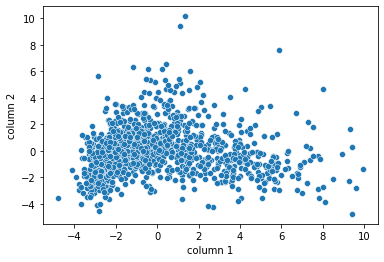

In [96]:
sns.scatterplot(data = principalDf, x = "column 1", y = "column 2",palette = "coolwarm_r")

In [107]:
# Perform K-means algorithm
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init = 3, init = "random", random_state = 42)
km.fit(principalDf)
y_kmeans = km.predict(principalDf)
y_kmeans

array([1, 2, 1, ..., 1, 2, 1])

AttributeError: module 'matplotlib' has no attribute 'scatter'

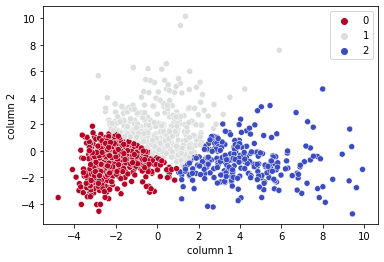

In [98]:
# Plot clusters - this is done by colour coding the data points according to which cluster the data point belongs to
sns.scatterplot(data=principalDf, x="column 1", y="column 2", hue= y_kmeans, palette = "coolwarm_r")
centers = km.cluster_centers_# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6);
plt.xlabel("column 1")
plt.ylabel("column 2")

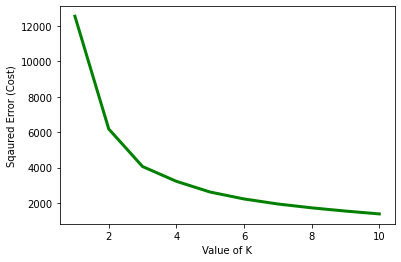

In [109]:
import matplotlib.pyplot as plt 
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(principalDf) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 


In [100]:
p

array([5, 2, 2, ..., 0, 4, 0], dtype=int32)

In [101]:
# denormalize data
X = sns.inverse_transform(principalDf)
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=p)
plt.show()

AttributeError: module 'seaborn' has no attribute 'inverse_transform'

AttributeError: module 'matplotlib' has no attribute 'scatter'

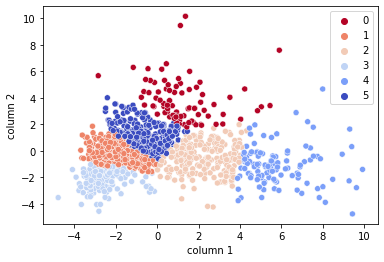

In [102]:
p=kmeans(principalDf,6)
    # Plot clusters - this is done by colour coding the data points according to which cluster the data point belongs to
    sns.scatterplot(data=principalDf, x="column 1", y="column 2", hue= p, palette = "coolwarm_r")
    centers = km.cluster_centers_# Plot centers
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6);
    plt.xlabel("column 1")
    plt.ylabel("column 2")